In [3]:
# from dataset.trackml.dataset   import load_event, load_dataset
# from dataset.trackml.randomize import shuffle_hits
# from dataset.trackml.score     import score_event
# from dataset.others import *

import os

import numpy as np
import pandas as pd
from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.cluster.dbscan_ import dbscan
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import operator
%matplotlib inline

event_prefix = 'event000001001'
hits, cells, particles, truth = load_event(os.path.join('train_100_events/', event_prefix))



#######All new pd.dataframe goes here
hits_playground = hits[["x","y","z"]]
hits_playground["r"] =np.sqrt(hits_playground["x"]**2 + hits_playground["y"]**2 + hits_playground["z"]**2)
hits_playground["phi"] = np.degrees(np.arctan2(hits_playground["y"], hits_playground["x"]))
hits_playground["theta"] = np.degrees(np.arccos(hits_playground["z"]/hits_playground["r"]))

# real_particles 
real_particles = particles[particles["particle_id"] != 0]
particles_count = real_particles.shape[0]
neutral_particles = particles[particles["q"] == 0]
hits_playground["r"].ix[particles_count]
no_hits_particles = particles[particles["nhits"] == 0]
new_truth = truth
new_truth['Energy'] = np.sqrt(truth['tpx']**2 + truth['tpy']**2 + truth['tpz']**2)

#new_truth

real_particles['Energy'] = np.sqrt(real_particles['px']**2 + real_particles['py']**2 + real_particles['pz']**2)



real_particles.sort_values("Energy")

truth_playground = truth
truth_playground["r"] =np.sqrt(truth_playground["tx"]**2 + truth_playground["ty"]**2 + truth_playground["tz"]**2)
truth_playground["phi"] = np.degrees(np.arctan2(truth_playground["ty"], truth_playground["tx"]))
truth_playground["theta"] = np.degrees(np.arccos(truth_playground["tz"]/truth_playground["r"]))
truth_playground['Energy'] = np.sqrt(truth['tpx']**2 + truth['tpy']**2 + truth['tpz']**2)

truth_playground

/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,Energy,r,phi,theta
0,1,324262265547128832,-69.290901,-0.794919,-1502.5,-0.511341,0.019336,-11.069000,0.000009,1.108082e+01,1504.097046,-179.342712,177.359436
1,2,45044036452483072,-73.306801,-8.292610,-1502.5,-0.304958,-0.054226,-6.365820,0.000009,6.373351e+00,1504.310181,-173.546021,177.188873
2,3,99080634911162368,-63.819698,-5.603060,-1502.5,-0.195871,-0.036081,-4.654030,0.000011,4.658289e+00,1503.865234,-174.982559,177.558395
3,4,360288863542837248,-72.108704,-9.734450,-1502.5,-0.471937,-0.090322,-9.950480,0.000009,9.962075e+00,1504.260864,-172.311722,177.227448
4,5,175642928088088576,-93.505600,-0.688461,-1502.5,-0.684687,0.025229,-10.986000,0.000011,1.100734e+01,1505.406982,-179.578140,176.438766
5,6,607988217437749248,-94.062500,-0.140013,-1502.5,-0.751325,-0.025789,-12.135300,0.000012,1.215856e+01,1505.441406,-179.914703,176.417770
6,7,301746122836148224,-84.052597,-14.139700,-1502.5,-1.064840,-0.153445,-19.016001,0.000017,1.904641e+01,1504.915649,-170.450851,176.753189
7,8,175642790649135104,-71.731499,-0.651773,-1502.5,-0.230322,-0.017360,-4.940120,0.000009,4.945517e+00,1504.211426,-179.479401,177.266617
8,9,423339945520791552,-69.304298,-0.849361,-1502.5,-1.694400,0.002276,-36.858601,0.000028,3.689753e+01,1504.097778,-179.297836,177.358826
9,10,112593495377575936,-57.617599,-5.953970,-1502.5,-0.398745,-0.029849,-10.357200,0.000010,1.036492e+01,1503.616089,-174.100220,177.792282


In [22]:
truth_hits_in_cone = truth_playground[(truth_playground["theta"].between(2.55, 3.56, inclusive=True)) & (truth_playground["phi"].between(100., 111.56, inclusive=False))] #& hits_playground["theta"]>179]
truth_hits_in_cone["particle_id"]

37536    580966619673526272
37538    639512384037191680
37582    639512384037191680
37611    621504101561139200
37612    779125346875211776
37617    580966619673526272
37654    580966619673526272
37664    621504101561139200
37666    639512384037191680
37740    621504101561139200
39665                     0
39695    387319394839035904
39699    580966619673526272
39705    324262884022419456
39707    603500010973167616
39715    639512384037191680
39755     49546948885086208
39756    621504101561139200
39758    639512384037191680
39764    729587743838961664
39780    580966619673526272
39786    387319394839035904
39787    324262884022419456
39790    603500010973167616
39800    729587743838961664
39802     49546948885086208
39804    621504101561139200
39815    387319394839035904
39816    580966619673526272
39820    639512384037191680
                ...        
45286     49546948885086208
45297                     0
45302    603500010973167616
45303    387319394839035904
45304     4954694888

Estimated number of clusters: 10
DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    min_samples=10, n_jobs=1, p=None)


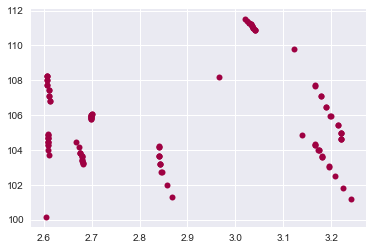

In [28]:
pd.unique(truth_hits_in_cone["particle_id"])

X = truth_hits_in_cone[["theta", "phi"]]
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = 10

print('Estimated number of clusters: %d' % n_clusters_)




#X = truth_hits_in_cone
unique_labels = set(labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 10)]
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]

#     class_member_mask = (labels == k)

#     xy = X[class_member_mask & core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=14)

#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=6)
    
# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()

print(db)
X


plt.plot(X["theta"], X["phi"], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


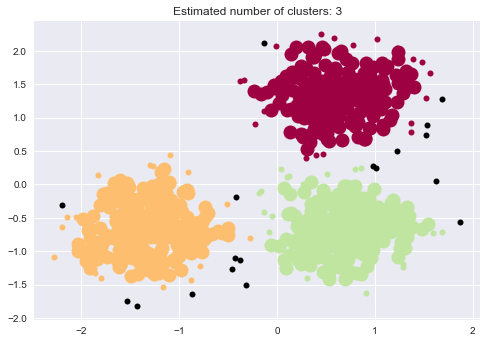

In [6]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [8]:
X.shape

(750, 2)